In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.express as px

In [7]:
#Display setting to see everything in each row
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', 600)

In [8]:
train=pd.read_csv('train.csv')

In [9]:
test=pd.read_csv('test.csv')

In [10]:
train_labels=pd.read_csv('train_labels.csv')

In [11]:
df_full=pd.read_csv('visualization_data.csv')
df_reduced=pd.read_csv('Reduced_visualization_data.csv')

In [20]:
train.shape

(11341042, 11)

In [50]:
def get_time(df):
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df['date'] = df['timestamp'].dt.date
    df['month'] = df['timestamp'].dt.month
    df['hour'] = df['timestamp'].dt.hour
    df['dayofweek'] = df['timestamp'].dt.dayofweek
    return df
    
train = get_time(train)

Below, you can see that a lot of Chest Sorter assessments were never solved. Bird Measurer also seems hard with a relatively small amount solved on the first attempt.

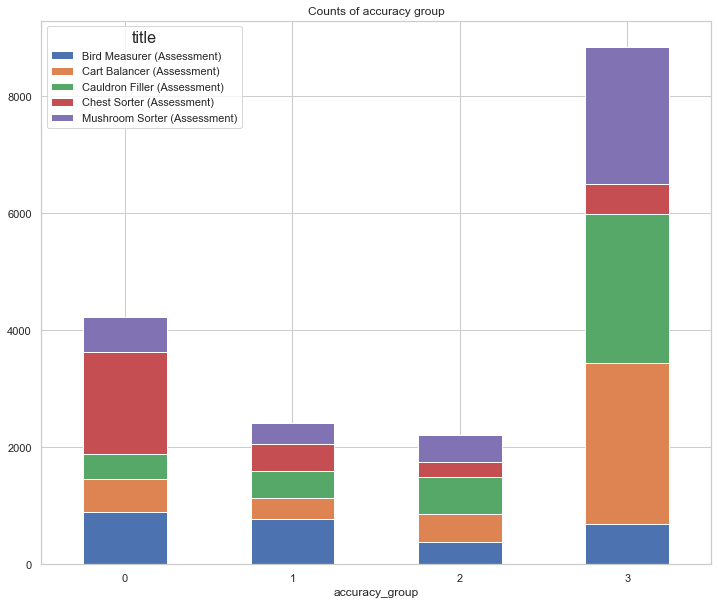

#### 1) Hour spend on each world

In [34]:
#Train
world_hour=[]
world_index=train.world.unique()
for i in world_index:
    temp=train[train.world==i].groupby("game_session").last().game_time
    world_hour.append(temp.values.sum()/(60*60*1000))

train_worlds=pd.Series(data=world_hour, index=world_index)

In [42]:
#Test
world_hour=[]
world_index=train.world.unique()
for i in world_index:
    temp=test[test.world==i].groupby("game_session").last().game_time
    world_hour.append(temp.values.sum()/(60*60*1000))

test_worlds=pd.Series(data=world_hour, index=world_index)

In [45]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'xy'}, {'type':'xy'}]])
fig.add_trace(
    go.Bar(y=train_worlds.values, x=train_worlds.index),
    row=1, col=1
)

fig.add_trace(
    go.Bar(y=test_worlds.values, x=test_worlds.index),
    row=1, col=2
)

fig.update_layout(
    title_text="World of Apps",
    height=500, width=800, showlegend=False)

fig['layout']['xaxis1'].update(title='Train')
fig['layout']['yaxis1'].update(title='Hours')

fig['layout']['xaxis2'].update(title='Test')
fig['layout']['yaxis2'].update(title='Hours')
fig.show()

#### 2) Time spend on each type

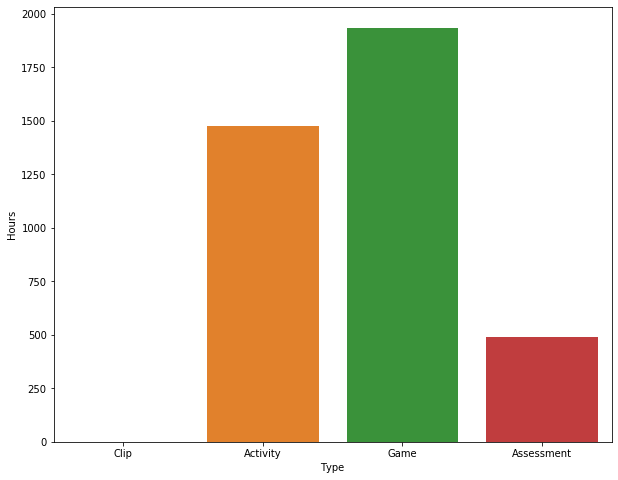

In [48]:
plt.figure(figsize=(10,8))
x1=df_reduced.GT_type_Clip.sum()/(60*60*1000)
x2=df_reduced.GT_type_Activity.sum()/(60*60*1000)
x3=df_reduced.GT_type_Game.sum()/(60*60*1000)
x4=df_reduced.GT_type_Assessment.sum()/(60*60*1000)

groupedvalues=pd.DataFrame({'Type':['Clip','Activity', 'Game', 'Assessment'], 'Hours':[x1,x2,x3,x4]} )
ax = sns.barplot(x='Type',y='Hours',data=groupedvalues)
plt.show()

#### 4) Time spent per day

In [70]:
temp=train.groupby("game_session", as_index=False ).last()
game_time_sum=temp.groupby('date').agg('sum').game_time/(60*60*1000)

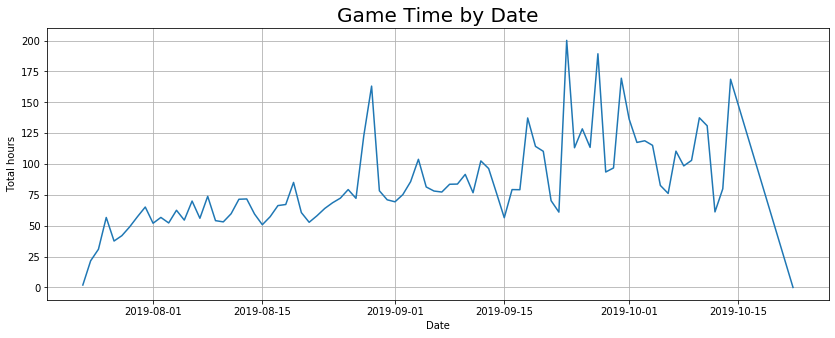

In [122]:
fig, ax = plt.subplots(figsize=(14,5))
ax.plot(game_time_sum.index, game_time_sum.values)
plt.xlabel("Date")
plt.ylabel("Total hours")
plt.title("Game Time by Date",{'fontsize': 20})
ax.grid()
plt.show()

#### 5) Event counts by hour of day

In [75]:
temp=train.groupby('game_session',as_index=False).last()
hour_hours=temp.groupby('hour').game_time.sum()/(60*60*1000)

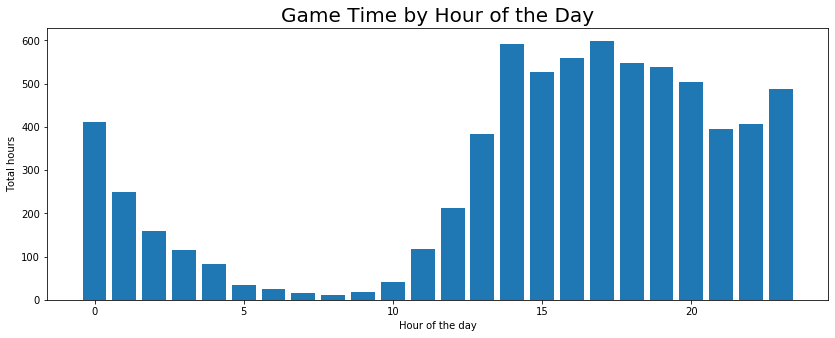

In [108]:
plt.figure(figsize=(14,5))
plt.bar(hour_hours.index, hour_hours.values)
plt.xlabel("Hour of the day")
plt.ylabel("Total hours")
plt.title("Game Time by Hour of the Day",{'fontsize': 20})
plt.show()

When looking at the numbers by hour of the day, I find the distribution a little bit strange. Kids seem up late at night and don't do much early in the morning. Has this something to do with time zones perhaps?

#### 6) Day of the week

In [165]:
train.columns

Index(['event_id', 'game_session', 'timestamp', 'event_data',
       'installation_id', 'event_count', 'event_code', 'game_time', 'title',
       'type', 'world', 'date', 'month', 'hour', 'dayofweek'],
      dtype='object')

In [166]:
temp=train.groupby('game_session',as_index=False).last()
dayofweek_hours=temp.groupby('dayofweek').game_time.sum()/(60*60*1000)

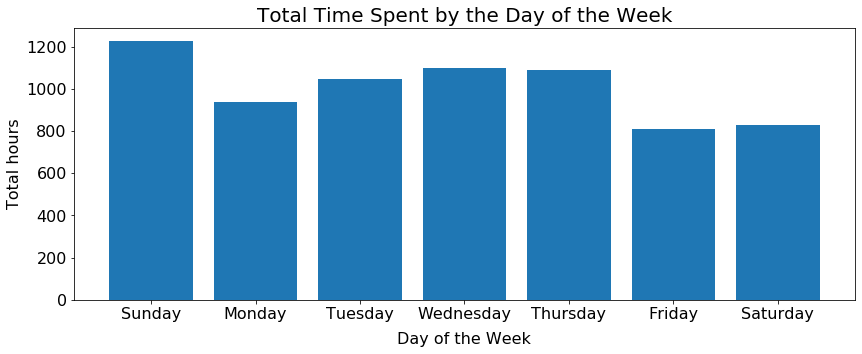

In [171]:
dayofweek=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.figure(figsize=(14,5))
plt.bar(dayofweek, dayofweek_hours.values)
plt.xlabel("Day of the Week",labelpad=10)
plt.ylabel("Total hours")
plt.title("Total Time Spent by the Day of the Week",{'fontsize': 20})
plt.show()

#### 6) Label Distribution

In [154]:
len(train_labels)

17690

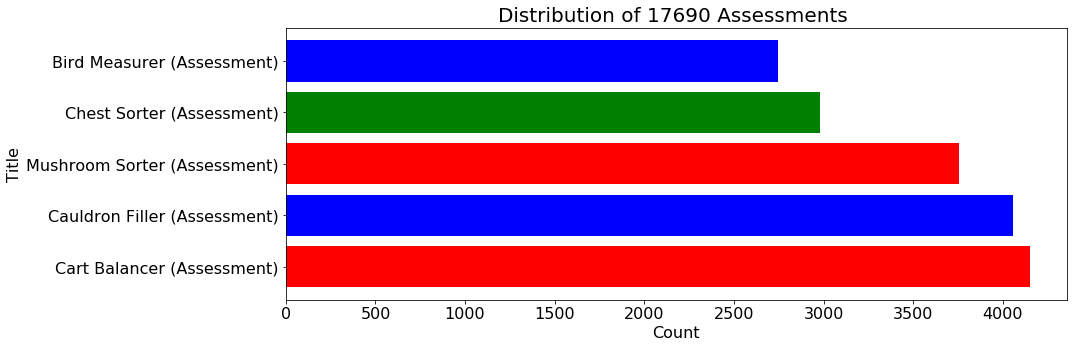

In [155]:
plt.figure(figsize=(14,5))
plt.barh(train_labels.title.value_counts().index, 
            train_labels.title.value_counts().values, 
            color=['red', 'blue', 'red','green','blue'])

plt.xlabel("Count")
plt.ylabel("Title")
plt.title("Distribution of 17690 Assessments ",{'fontsize': 20})
plt.show()

In [138]:
for i in train_labels.title.unique():
    j=train[train.title==i].world.unique()[0]
    print("{} : {}".format(i,j))

Mushroom Sorter (Assessment) : TREETOPCITY
Bird Measurer (Assessment) : TREETOPCITY
Cauldron Filler (Assessment) : MAGMAPEAK
Chest Sorter (Assessment) : CRYSTALCAVES
Cart Balancer (Assessment) : CRYSTALCAVES


#### 7) Accuracy group distribution

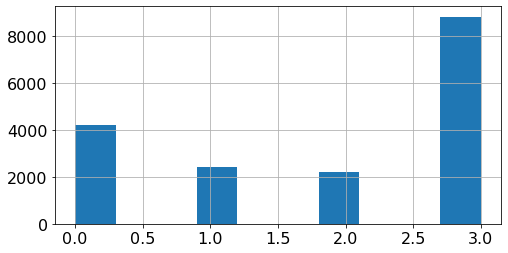

In [160]:
plt.figure(figsize=(8,4))
train_labels.accuracy_group.hist() 
plt.show()

#### 8) Label and Assessment Distribution

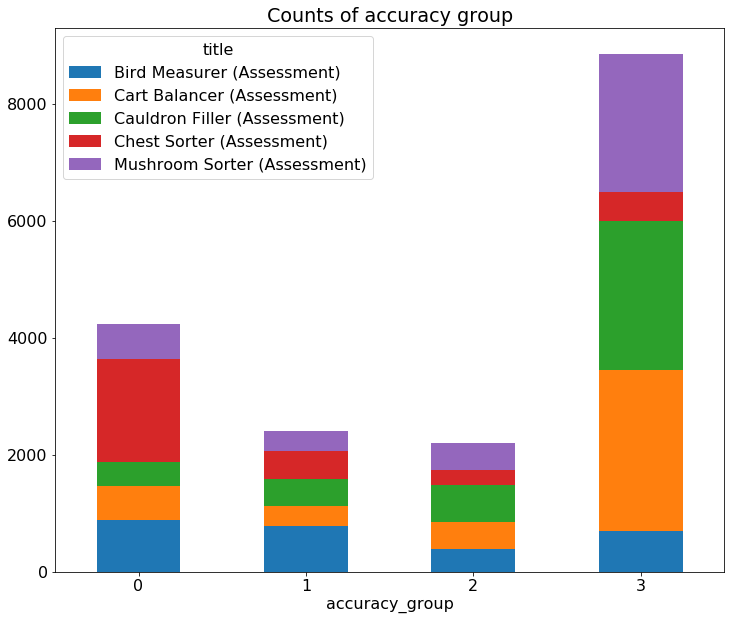

In [161]:
plt.rcParams.update({'font.size': 16})

se = train_labels.groupby(['title', 'accuracy_group'])['accuracy_group'].count().unstack('title')
se.plot.bar(stacked=True, rot=0, figsize=(12,10))
plt.title("Counts of accuracy group")
plt.show()

In [163]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11341042 entries, 0 to 11341041
Data columns (total 15 columns):
event_id           object
game_session       object
timestamp          datetime64[ns, UTC]
event_data         object
installation_id    object
event_count        int64
event_code         int64
game_time          int64
title              object
type               object
world              object
date               object
month              int64
hour               int64
dayofweek          int64
dtypes: datetime64[ns, UTC](1), int64(6), object(8)
memory usage: 1.3+ GB


In [164]:
for i in train.columns:
    print("{} : {}".format(i,train[i].nunique()))

event_id : 384
game_session : 303319
timestamp : 10777308
event_data : 10893749
installation_id : 17000
event_count : 3368
event_code : 42
game_time : 834048
title : 44
type : 4
world : 4
date : 85
month : 4
hour : 24
dayofweek : 7
